In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

In [2]:
temp=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/bathy_meterNoMaskWidth.nc')

In [3]:
temp2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runPISCES/bathy_level.nc','w')

In [4]:
B=np.copy(temp.variables['Bathymetry'])

In [5]:

X=temp.variables['x']
Y=temp.variables['y']

In [6]:
temp2.createDimension('y', B.shape[0])
temp2.createDimension('x',B.shape[1])

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1100

In [7]:
print(X[0,:]/1000)

[  0.00000000e+00   5.00000000e-01   1.00000000e+00 ...,   5.48500000e+02
   5.49000000e+02   5.49500000e+02]


In [8]:
B=np.round(np.sin((X[:,:]/30000.0))*30+40)
print(B[0,:])

[ 40.  40.  41. ...,  24.  24.  25.]


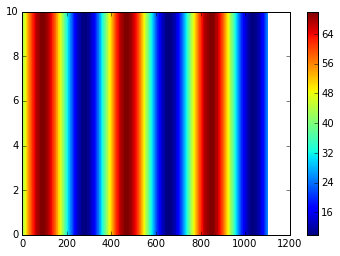

In [9]:
plt.pcolormesh(B[:]); plt.colorbar()

In [10]:
new_x=temp2.createVariable('x',float,('y','x'), zlib=True)
new_x.setncattr('units','metres')
new_y = temp2.createVariable('y',float,('y','x'), zlib=True)
new_y.setncattr('units','metres')
newdepths = temp2.createVariable(
    'Bathy_level', float, ('y','x'),
    zlib = True, least_significant_digit=1)
newdepths.setncattr('units','metres')

In [11]:
new_x[:]=X;
new_y[:]=Y;
newdepths[:]=B

In [12]:
temp2.close()

In [13]:
temp.close()